<a href="https://colab.research.google.com/github/tr-dev-bc/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter02/05_Building_a_neural_network_using_PyTorch_on_a_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [22]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
print('x tensor is: \n',X.dtype,X,'\n y tensor is: \n',Y)

x tensor is: 
 torch.float32 tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]]) 
 y tensor is: 
 tensor([[ 3.],
        [ 7.],
        [11.],
        [15.]])


In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(torch.cuda.is_available())
X = X.to(device)
Y = Y.to(device)

False


In [5]:
import torch.nn as nn

In [6]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [7]:
mynet = MyNeuralNet().to(device)

In [8]:
mynet.input_to_hidden_layer.weight


Parameter containing:
tensor([[-0.1453,  0.4533],
        [-0.1215,  0.2782],
        [ 0.5456,  0.6562],
        [ 0.6249,  0.4466],
        [-0.2275,  0.3103],
        [ 0.1078,  0.5880],
        [-0.3862, -0.0483],
        [ 0.6023, -0.1608]], requires_grad=True)

In [9]:
#mynet.parameters()
#mynet.input_to_hidden_layer.bias
for par in mynet.parameters():
    print (par)

Parameter containing:
tensor([[-0.1453,  0.4533],
        [-0.1215,  0.2782],
        [ 0.5456,  0.6562],
        [ 0.6249,  0.4466],
        [-0.2275,  0.3103],
        [ 0.1078,  0.5880],
        [-0.3862, -0.0483],
        [ 0.6023, -0.1608]], requires_grad=True)
Parameter containing:
tensor([-0.1172, -0.1412, -0.0276,  0.5489, -0.3620, -0.0943, -0.5015,  0.5872],
       requires_grad=True)
Parameter containing:
tensor([[ 0.2689, -0.1543,  0.0753, -0.3430,  0.1732,  0.2567, -0.1611, -0.0759]],
       requires_grad=True)
Parameter containing:
tensor([0.1148], requires_grad=True)


In [15]:
loss_func = nn.MSELoss()

In [16]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(0.0413, grad_fn=<MseLossBackward0>)


In [12]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [13]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())
    #print(loss_history)

Text(0, 0.5, 'loss value')

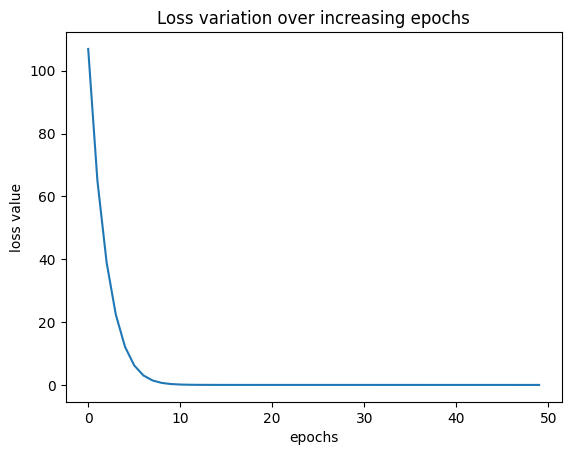

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')